In [18]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import matplotlib.pyplot as plt

In [19]:
class ShowerEnv(Env):
    def __init__(self):
        #Action we can take, down, stay, up
        # self.action_space=Discrete(3)
        self.action_space=Box(low=np.array([0]), high=np.array([2]),dtype=np.float32)
        #Temperature array
        self.observation_space=Box(low=np.array([0]), high=np.array([1]),dtype=np.float32)
        # set start temp
        # self.state=np.array([38+random.uniform(-3, 3), 38+random.uniform(-3, 3), 38+random.uniform(-3, 3)])
        # Temparture, Mo
        self.state=np.array([25.0, 1.0])
        # set shower length
        self.time_id=0
        self.dt=0.2
        self.error_thres=0.001

    def step(self, action):
        #Apply Action
        self.state[0] += action
        #Reduce Shower length by 1 second
        self.time_id += self.dt

        T=self.state[0].item()
        t=self.time_id
        Mo=self.state[1].item()
        

        ke = 0.0008 * np.exp(0.0485 * T)
        Me_val = 0.317 - 0.0053 * T
        #Mo_new=(Mo - Me_val) * np.exp(-ke * t) + Me_val
        Mo_new=Mo+(-ke)*(Mo - Me_val) * np.exp(-ke * t)

        self.state[1]=Mo_new

        Mo_desire=1-0.002*t
        
        error=abs(Mo_new-Mo_desire)
                

        # Calculate reward
        if error<self.error_thres:
            reward = 1
            #print('a')
        else:
            reward = -1
            #print('b')

        # Check if shower is done
        if self.time_id >=1000:
            done = True
        else:
            done = False

        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}

        #return step information
        return self.state, reward, done, info

    def render(self):
        print(self.state)
        pass

    def reset(self):
        # reset start temp
        # self.state=38+random.randint(-3,3)
        # # set shower length
        # self.shower_length=60
        # return self.state
        print("reset activate")
        # Temparture, Mo
        self.state=np.array([25.0, 1.0])
        # set shower length
        self.time_id=0



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


reset activate
Episode:1 Score:-4988


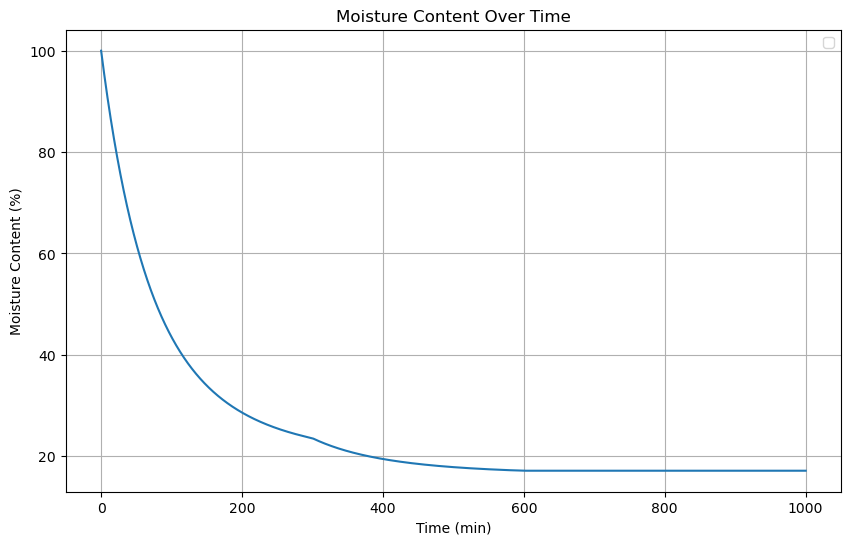

In [20]:
env=ShowerEnv()
episodes=1

time=[]
moisture_content=[]


for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    time.append(env.time_id)
    moisture_content.append(100*env.state[1].item())

    while not done:
        #env.render()
        action=0
        if env.time_id > 299.9 and env.time_id <300.1:
            action = 20

        if env.time_id > 599.9 and env.time_id <600.1:
            action = 20
        
        n_state, reward, done, info = env.step(action)
        score+=reward
        time.append(env.time_id)
        moisture_content.append(100*env.state[1].item())
        T=env.state[0].item()

    print(f'Episode:{episode} Score:{score}')
    # Plot the results
    plt.figure(figsize=(10, 6))
    #plt.plot(time, moisture_content, label=f'T={T}Â°C')
    plt.plot(time, moisture_content)
    plt.xlabel('Time (min)')
    plt.ylabel('Moisture Content (%)')
    plt.title('Moisture Content Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [4]:
env.action_space.sample()

array([1.767318], dtype=float32)

In [5]:
env.state.item()

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
env.state>40

In [ ]:
np.array([38+random.randint(-3,3), 38+random.randint(-3,3), 38+random.randint(-3,3)])

In [ ]:
a=np.array([38+random.uniform(-3, 3), 38+random.uniform(-3, 3), 38+random.uniform(-3, 3)])

In [ ]:
print(a)
print(a[0].item())
print(a[1].item())
print(a[2].item())